## Titanic Project (Kaggle)

In [45]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#{}
from pylab import rcParams
rcParams['figure.figsize'] = 7, 14

In [46]:
titanicDF = pd.read_csv('train.csv')
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [47]:
#titanicDF['Sex'].value_counts()

In [48]:
#titanicDF['Pclass'].value_counts()

In [49]:
#titanicDF['Embarked'].value_counts()

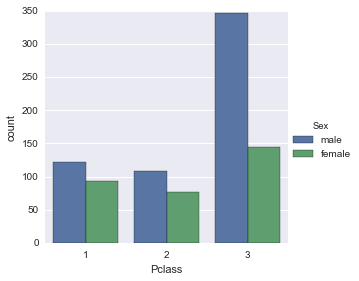

In [50]:
sns.factorplot("Pclass", data=titanicDF, kind='count', hue='Sex')
